In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime as dt 
import warnings 

In [2]:
# Loading the data 

loan_df = pd.read_csv('loan.csv', low_memory=False)

In [ ]:
#1 Data Cleaning

#1.1 Check if the headers or footers have bad details and eliminate them.


In [3]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
loan_df.shape

(39717, 111)

In [5]:
#To Check if the headers or footers have bad details and eliminate them.

loan_df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
total_rows = len(loan_df)
print(total_rows) 

39717


In [7]:
# Check whether there are any duplicate rows.

dupli_rows = len(loan_df[loan_df.duplicated()])
print("Duplicated Rows: ", round(dupli_rows,2))

Duplicated Rows:  0


In [8]:
#Dropping the rows where the loan status is current since they will not help us determine whether the client will default or not.

loan_df_filtered = loan_df.loc[loan_df['loan_status'] != 'Current']
num_rows_filtered = len(loan_df_filtered)
print(f"Total number of rows after filtering: {num_rows_filtered}")

Total number of rows after filtering: 38577


In [9]:
#Deleting the rows
deleted_rows = total_rows - len(loan_df_filtered)
print("Number of rows deleted:", deleted_rows)

Number of rows deleted: 1140


In [10]:
#1.2 Deleting the Unwanted Columns 
loan_df_filtered.shape

(38577, 111)

In [11]:
# Seeing if there are columns that contains null values 

null_percentage = loan_df_filtered.isnull().sum() * 100 / len(loan_df_filtered)
print("Percentage of null values in filtered dataframe:")
print(null_percentage)

Percentage of null values in filtered dataframe:
id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.101097
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64


In [12]:
# Removing the columns that contains all null values and hence of no use
na_columns_count = len(loan_df_filtered.columns[loan_df_filtered.isna().all()].tolist())
print("Total columns with all NA values: ", na_columns_count)
na_columns_list = list(loan_df_filtered.columns[loan_df_filtered.isna().all()])
print("List of columns with all NA values:")
print(na_columns_list)

Total columns with all NA values:  55
List of columns with all NA values:
['next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_b

In [13]:
# Also Deleting the columns which contains values as NA.

loan_df_filtered = loan_df_filtered.dropna(axis=1, how="all")
print(loan_df_filtered)

            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
5      1075269    1311441       5000         5000           5000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ... last_pymnt_amnt  \
0       36 months   10.65%       162.87     B        B2  ...          171.62   

In [14]:
loan_df_filtered = loan_df_filtered.dropna(axis=0, how="all")
print(loan_df_filtered)

            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
5      1075269    1311441       5000         5000           5000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ... last_pymnt_amnt  \
0       36 months   10.65%       162.87     B        B2  ...          171.62   

In [15]:
#Finding unique columns 
unique_columns = [col for col in loan_df_filtered.columns if loan_df_filtered[col].nunique() == len(loan_df_filtered)]
unique_columns




['id', 'member_id', 'url']

In [16]:
# Deleting this unique columns becuase they will not help in EDA

loan_df_filtered.drop(['url','member_id'],axis=1, inplace=True)


In [17]:
loan_df_filtered.shape

(38577, 54)

In [18]:
#Let's delete the column which is having text/description values as they don't donctribute to EDA.

loan_df_filtered = loan_df_filtered.drop(columns=['desc', 'title'])
print("Shape of DataFrame after dropping columns:", loan_df_filtered.shape)

Shape of DataFrame after dropping columns: (38577, 52)


In [19]:
#We will limit our analysis till group level only. hence deleting the subgroups.

loan_df_filtered = loan_df_filtered.drop(['sub_grade'],  axis=1)

In [20]:
#Behavioural data is captured post loan approval and will not be available during the loan approval process. Hence removing these fields.
behavioural_cols=['delinq_2yrs', 'earliest_cr_line', 'last_pymnt_amnt','inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
                          'out_prncp', 'out_prncp_inv', 'total_pymnt','total_pymnt_inv', 'total_rec_prncp',
                          'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                        'application_type','last_pymnt_d','last_credit_pull_d']

loan_df_filtered=loan_df_filtered.drop(behavioural_cols,axis=1)

In [21]:
loan_df_filtered.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
loan_status                       2
term                              2
verification_status               3
pub_rec_bankruptcies              3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
addr_state                       50
issue_d                          55
mths_since_last_delinq           95
mths_since_last_record          111
int_rate                        370
zip_code                        822
loan_amnt                       870
funded_amnt                    1019
dti                            2853
annual_inc                     5215
funded_amnt_inv                8050
installment                 

In [22]:
#most of the column value is 1 deleting them as well 

unique_columns = []
for column in loan_df_filtered.columns:
    if loan_df_filtered[column].nunique(dropna=True) == 1:
        unique_columns.append(column)
loan_df_filtered = loan_df_filtered.drop(columns=unique_columns)
print("DataFrame after dropping columns with only one unique value:")
print(loan_df_filtered)


DataFrame after dropping columns with only one unique value:
            id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0      1077501       5000         5000           4975.0   36 months   10.65%   
1      1077430       2500         2500           2500.0   60 months   15.27%   
2      1077175       2400         2400           2400.0   36 months   15.96%   
3      1076863      10000        10000          10000.0   36 months   13.49%   
5      1075269       5000         5000           5000.0   36 months    7.90%   
...        ...        ...          ...              ...         ...      ...   
39712    92187       2500         2500           1075.0   36 months    8.07%   
39713    90665       8500         8500            875.0   36 months   10.28%   
39714    90395       5000         5000           1325.0   36 months    8.07%   
39715    90376       5000         5000            650.0   36 months    7.43%   
39716    87023       7500         7500            800.0   3

In [23]:
#Dropping the columns which is having more than 50% of value is null

total_rows = len(loan_df_filtered)
columns_to_drop = []

for column in loan_df_filtered.columns:
    if loan_df_filtered[column].isna().mean().round(2) >= 0.50:
        columns_to_drop.append(column)

loan_df_filtered = loan_df_filtered.drop(columns=columns_to_drop)
print("Shape of DataFrame after dropping columns with >=50% missing values:", loan_df_filtered.shape)


Shape of DataFrame after dropping columns with >=50% missing values: (38577, 20)


In [24]:
#Deleting emp_title as its description or textual informations and doesn't participate in EDA analysis.
loan_df_filtered=loan_df_filtered.drop(['emp_title'], axis=1)

In [25]:
#2 Data Conversion

loan_df_filtered.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [26]:
counts = loan_df_filtered['term'].value_counts()
print(counts)

 36 months    29096
 60 months     9481
Name: term, dtype: int64


In [27]:
#Convert term from string to int

loan_df_filtered['term'] = loan_df_filtered['term'].apply(lambda x: int(x.strip().split()[0]))
print("Data type of 'term' column after cleaning:", loan_df_filtered['term'].dtype)


Data type of 'term' column after cleaning: int64


In [28]:
loan_df_filtered['term'].value_counts()

36    29096
60     9481
Name: term, dtype: int64

In [29]:
int_rate_counts = loan_df_filtered['int_rate'].value_counts()
print(int_rate_counts)


10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: int_rate, Length: 370, dtype: int64


In [30]:
#Converting int_rate to float

loan_df_filtered['int_rate'] = loan_df_filtered['int_rate'].str.rstrip('%').astype(float)


In [31]:
loan_df_filtered['int_rate'].value_counts()

10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: int_rate, Length: 370, dtype: int64

In [32]:
#Converting the column loan_funded_amt and funded_amt as flot64

loan_df_filtered[['loan_amnt', 'funded_amnt']] = loan_df_filtered[['loan_amnt', 'funded_amnt']].astype(float)
print(loan_df_filtered)


            id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0      1077501     5000.0       5000.0           4975.0    36     10.65   
1      1077430     2500.0       2500.0           2500.0    60     15.27   
2      1077175     2400.0       2400.0           2400.0    36     15.96   
3      1076863    10000.0      10000.0          10000.0    36     13.49   
5      1075269     5000.0       5000.0           5000.0    36      7.90   
...        ...        ...          ...              ...   ...       ...   
39712    92187     2500.0       2500.0           1075.0    36      8.07   
39713    90665     8500.0       8500.0            875.0    36     10.28   
39714    90395     5000.0       5000.0           1325.0    36      8.07   
39715    90376     5000.0       5000.0            650.0    36      7.43   
39716    87023     7500.0       7500.0            800.0    36     13.75   

       installment grade emp_length home_ownership  annual_inc  \
0           162.87     B  10+ yea

In [33]:
# Checking Grade Datatype 

loan_df_filtered['grade'].value_counts()

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

In [34]:
loan_df_filtered['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [35]:
#Rounding the belows to two decimals points.

columns_to_round = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']

for c in columns_to_round:
    loan_df_filtered[c] = loan_df_filtered[c].round(2)
    print(loan_df_filtered[c])


0         5000.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     2500.0
39713     8500.0
39714     5000.0
39715     5000.0
39716     7500.0
Name: loan_amnt, Length: 38577, dtype: float64
0         5000.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     2500.0
39713     8500.0
39714     5000.0
39715     5000.0
39716     7500.0
Name: funded_amnt, Length: 38577, dtype: float64
0         4975.0
1         2500.0
2         2400.0
3        10000.0
5         5000.0
          ...   
39712     1075.0
39713      875.0
39714     1325.0
39715      650.0
39716      800.0
Name: funded_amnt_inv, Length: 38577, dtype: float64
0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38577, dtype: float64
0        27.65
1         1.00
2         8.72
3        20.00
5        11.20
    

In [36]:
#Converting issue_date to date type 

loan_df_filtered['issue_d'] = pd.to_datetime(loan_df_filtered['issue_d'], format='%b-%y')
print(loan_df_filtered['issue_d'])


0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 38577, dtype: datetime64[ns]


In [37]:
(loan_df_filtered.isnull().sum()*100)/len(loan_df_filtered)

id                      0.000000
loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

In [38]:
# Dropping The Rows of emp_lenght and pub_rec_bankruptices columns as they are null in value

prev_rows = len(loan_df_filtered)
print(prev_rows)


38577


In [39]:
loan_df_filtered = loan_df_filtered.dropna(subset=['emp_length', 'pub_rec_bankruptcies'])

In [40]:
after_rows = len(loan_df_filtered)
print("Shape of DataFrame after deletion:", loan_df_filtered.shape)


Shape of DataFrame after deletion: (36847, 19)


In [41]:
(loan_df_filtered.isnull().sum()*100)/len(loan_df_filtered)

id                      0.0
loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
zip_code                0.0
addr_state              0.0
dti                     0.0
pub_rec_bankruptcies    0.0
dtype: float64

In [42]:
def strip_emp_length(x):
    x = x.replace("years", "").replace("<", "").replace(" ", "").replace("+", "")
    return x

loan_df_filtered['emp_length'] = loan_df_filtered['emp_length'].apply(strip_emp_length)


In [43]:
print(loan_df_filtered['emp_length'])

0           10
1        1year
2           10
3           10
5            3
         ...  
39562    1year
39573        3
39623        8
39666        2
39680        2
Name: emp_length, Length: 36847, dtype: object


In [ ]:
# Derived Columns


In [44]:
# Creating a dervied columns for issue month and issue year from issues date

loan_df_filtered['issue_year'] = loan_df_filtered['issue_d'].dt.year
loan_df_filtered['issue_month'] = loan_df_filtered['issue_d'].dt.month

Shape of DataFrame: (36847, 21)
Loan Amount Description:
count    36847.000000
mean     11141.327652
std       7369.988994
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


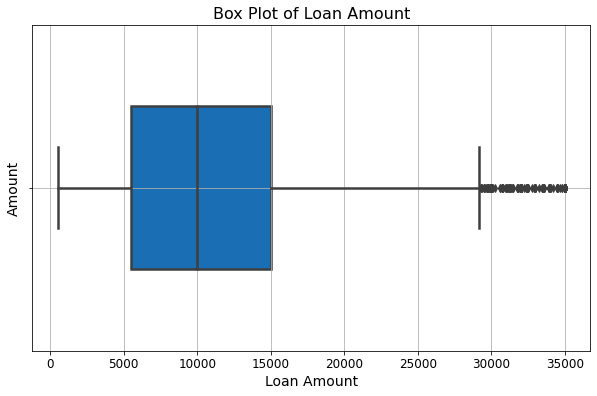

In [45]:
loan_amnt_description = loan_df_filtered["loan_amnt"].describe()
print("Shape of DataFrame:", loan_df_filtered.shape)
print("Loan Amount Description:")
print(loan_amnt_description)

mckinsey_colors = ["#0072CE", "#00A3E0", "#7BCFED", "#6F777D", "#949CA1"]

plt.figure(figsize=(10, 6))
sns.boxplot(x=loan_df_filtered['loan_amnt'], palette=mckinsey_colors, linewidth=2.5, width=0.5, fliersize=5)
plt.title('Box Plot of Loan Amount', fontsize=16)
plt.xlabel('Loan Amount', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()


In [ ]:
# Univariate Analysis 

In [46]:
# Column metadata used by functions below
column_titles = {
    'loan_amnt': 'Loan Amount',
    'funded_amnt': 'Funded Amount',
    'funded_amnt_inv': 'Funded Amount Investors',
    'term': 'Loan Term',
    'int_rate': 'Interest Rate',
    'installment': 'Installment',
    'grade': 'Grade',
    'emp_length': 'Employment Length',
    'home_ownership': 'Home Owner Status',
    'annual_inc': 'Annuap Income',
    'verification_status': 'Verification Status',
    'issue_d': 'Issue Date',
    'loan_status': 'Loan Status',
    'purpose': 'Purpose of Loan',
    'addr_state': 'State',
    'dti': 'Debt To Income Ratio',
    'pub_rec_bankruptcies': 'Bankruptcies Record',
    'issue_y': 'Issue Year',
    'issue_m': 'Issue Month',
    'issue_q': 'Issue Quarter',
    'loan_amnt_b': 'Loan Amount Bins',
    'funded_amnt_inv_b': 'Investor Funded Bins',
    'funded_amnt_b': 'Funded Amount Bins',
    'annual_inc_b': 'Annual Income Bins',
    'int_rate_b': 'Interest Rate Bins',
    'dti_b': 'DTI Bins'
}

In [ ]:
#Bucketing different varaibles for better analysis 

In [47]:
#Bucketting Loan Amount

def bucket_loan_amnt(column):
    if column <= 5000:
        return '0 - 5K'  
    elif column <= 10000:
        return '5K - 10K'
    elif column <= 15000:
        return '10K - 15K'
    else:
        return '15K - above' 

loan_df_filtered['loan_amnt_b'] = loan_df_filtered['loan_amnt'].apply(bucket_loan_amnt)


In [48]:
#bucketting Annual Income

def bucket_annual_inc(column):
    if column <= 40000:
        return '0 - 40k'  
    elif column <= 50000:
        return '40k - 50k'
    elif column <= 60000:
        return '50k to 60k'
    elif column <= 70000:
        return '60k to 70k'
    elif column <= 80000:
        return '70k to 80k'
    else:
        return '80k - above' 

loan_df_filtered['annual_inc_b'] = loan_df_filtered['annual_inc'].apply(bucket_annual_inc)


In [49]:
#Bucketing Intrest rate

def bucket_int_rate(column):
    if column <= 9:
        return 'Very Low'  
    elif column <= 11:
        return 'Low'
    elif column <= 13:
        return 'Moderate'
    elif column <= 15:
        return 'High'
    else:
        return 'Very High' 

loan_df_filtered['int_rate_b'] = loan_df_filtered['int_rate'].apply(bucket_int_rate)


In [50]:
# Bucketing dti

def bucket_dti(column):
    if column <= 8:
        return 'Very Low'  
    elif column <= 12:
        return 'Low'
    elif column <= 16:
        return 'Moderate'
    elif column <= 20:
        return 'High'
    else:
        return 'Very High' 

loan_df_filtered['dti_b'] = loan_df_filtered['dti'].apply(bucket_dti)


In [51]:
def plot_digram(df, column):
    fig, p = plot.subplots(1,2, figsize=(16, 4))
    sea.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=p[0])
    sea.boxplot(x=column, data=df, ax=p[1])
    p[0].set_xlabel(column_titles[column])
    p[1].set_xlabel(column_titles[column])
    plot.tight_layout()
    plot.show()

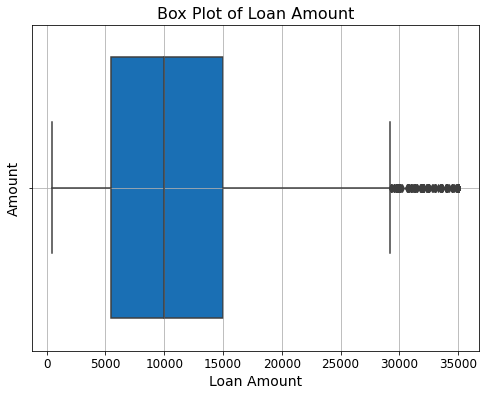

In [52]:
mckinsey_colors = ["#0072CE", "#00A3E0", "#7BCFED", "#6F777D", "#949CA1"]

plt.figure(figsize=(8, 6))
sns.boxplot(x=loan_df_filtered['loan_amnt'], palette=mckinsey_colors)
plt.title('Box Plot of Loan Amount', fontsize=16)
plt.xlabel('Loan Amount', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

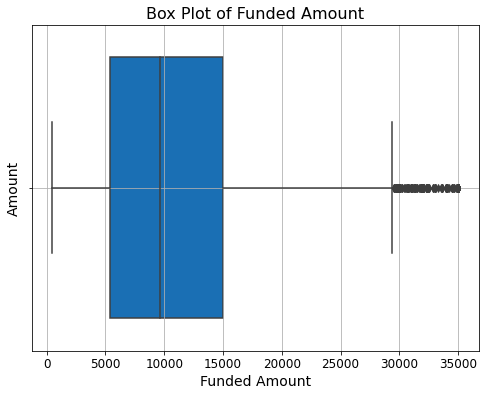

In [53]:
mckinsey_colors = ["#0072CE", "#00A3E0", "#7BCFED", "#6F777D", "#949CA1"]

plt.figure(figsize=(8, 6))
sns.boxplot(x=loan_df['funded_amnt'], palette=mckinsey_colors)
plt.title('Box Plot of Funded Amount', fontsize=16)
plt.xlabel('Funded Amount', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

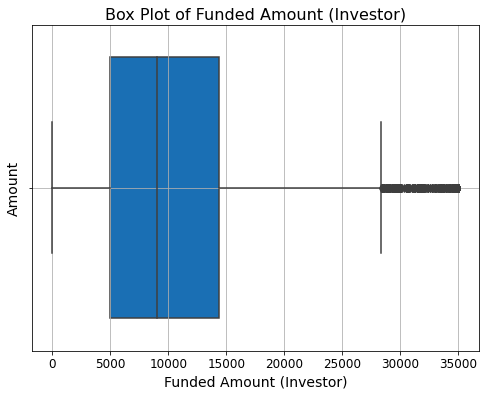

In [54]:
mckinsey_colors = ["#0072CE", "#00A3E0", "#7BCFED", "#6F777D", "#949CA1"]

plt.figure(figsize=(8, 6))
sns.boxplot(x=loan_df_filtered['funded_amnt_inv'], palette=mckinsey_colors)
plt.title('Box Plot of Funded Amount (Investor)', fontsize=16)
plt.xlabel('Funded Amount (Investor)', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

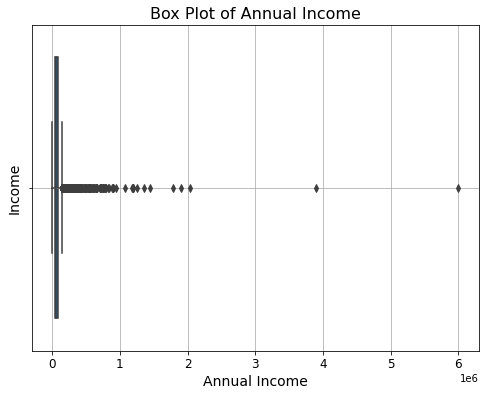

In [55]:
# Define the McKinsey color palette
mckinsey_colors = ["#0072CE", "#00A3E0", "#7BCFED", "#6F777D", "#949CA1"]

plt.figure(figsize=(8, 6))
sns.boxplot(x=loan_df['annual_inc'], palette=mckinsey_colors)
plt.title('Box Plot of Annual Income', fontsize=16)
plt.xlabel('Annual Income', fontsize=14)
plt.ylabel('Income', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()


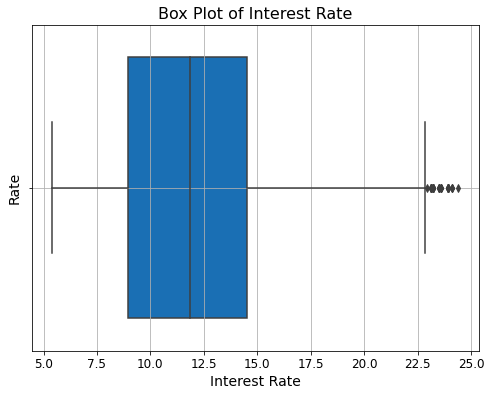

In [56]:
mckinsey_colors = ["#0072CE", "#00A3E0", "#7BCFED", "#6F777D", "#949CA1"]

plt.figure(figsize=(8, 6))
sns.boxplot(x=loan_df_filtered['int_rate'], palette=mckinsey_colors)
plt.title('Box Plot of Interest Rate', fontsize=16)
plt.xlabel('Interest Rate', fontsize=14)
plt.ylabel('Rate', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

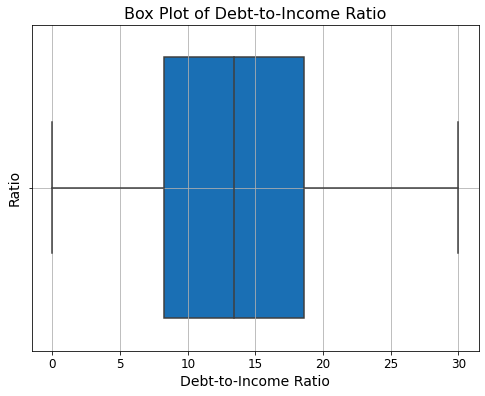

In [57]:
mckinsey_colors = ["#0072CE", "#00A3E0", "#7BCFED", "#6F777D", "#949CA1"]

plt.figure(figsize=(8, 6))
sns.boxplot(x=loan_df_filtered['dti'], palette=mckinsey_colors)
plt.title('Box Plot of Debt-to-Income Ratio', fontsize=16)
plt.xlabel('Debt-to-Income Ratio', fontsize=14)
plt.ylabel('Ratio', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

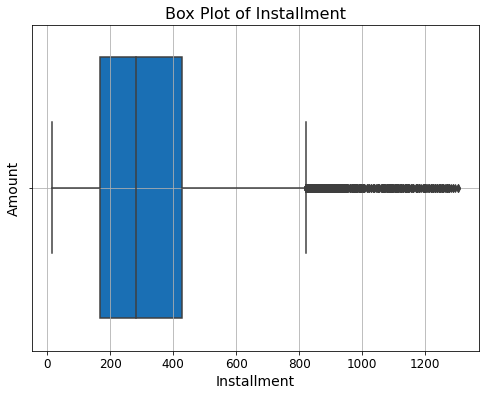

In [58]:
mckinsey_colors = ["#0072CE", "#00A3E0", "#7BCFED", "#6F777D", "#949CA1"]

plt.figure(figsize=(8, 6))
sns.boxplot(x=loan_df_filtered['installment'], palette=mckinsey_colors)
plt.title('Box Plot of Installment', fontsize=16)
plt.xlabel('Installment', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

In [59]:
def remove_outliers_iqr(data, columns, threshold):
    for col in columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert column to numeric
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

outliers_columns_set1 = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv']
outliers_columns_set2 = ['int_rate', 'installment', 'annual_inc']

loan_df_filtered = remove_outliers_iqr(loan_df_filtered, outliers_columns_set1, 1.5)
loan_df_filtered = remove_outliers_iqr(loan_df_filtered, outliers_columns_set2, 1.5)


/var/folders/18/tcml0vs95xxd98r5gdl1r88h0000gn/T/ipykernel_60442/3119308201.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert column to numeric


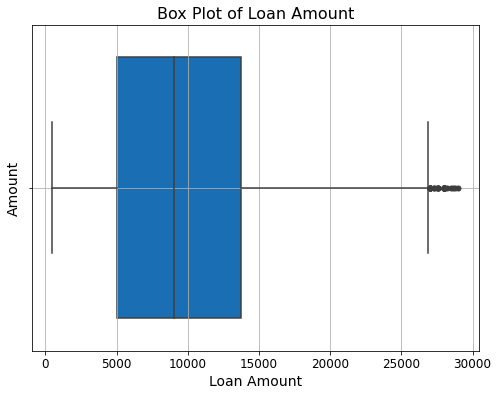

In [60]:
mckinsey_colors = ["#0072CE", "#00A3E0", "#7BCFED", "#6F777D", "#949CA1"]

plt.figure(figsize=(8, 6))
sns.boxplot(x=loan_df_filtered['loan_amnt'], color=mckinsey_colors[0], flierprops=dict(marker='o', color='red', markersize=5)) # Set outlier color to red
plt.title('Box Plot of Loan Amount', fontsize=16)
plt.xlabel('Loan Amount', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

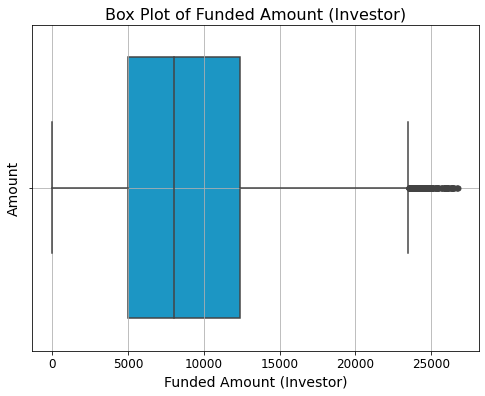

In [61]:
mckinsey_colors = ["#0072CE", "#00A3E0", "#7BCFED", "#6F777D", "#949CA1"]

plt.figure(figsize=(8, 6))
sns.boxplot(x=loan_df_filtered['funded_amnt_inv'], color=mckinsey_colors[1], flierprops=dict(marker='o', color='red', markersize=5)) # Set outlier color to red
plt.title('Box Plot of Funded Amount (Investor)', fontsize=16)
plt.xlabel('Funded Amount (Investor)', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

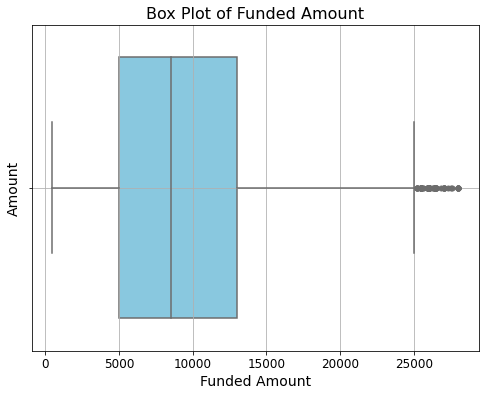

In [62]:
mckinsey_colors = ["#0072CE", "#00A3E0", "#7BCFED", "#6F777D", "#949CA1"]

plt.figure(figsize=(8, 6))
sns.boxplot(x=loan_df_filtered['funded_amnt'], color=mckinsey_colors[2], flierprops=dict(marker='o', color='red', markersize=5)) # Set outlier color to red
plt.title('Box Plot of Funded Amount', fontsize=16)
plt.xlabel('Funded Amount', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

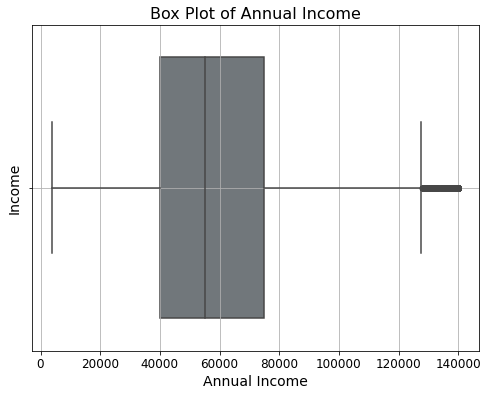

In [63]:
mckinsey_colors = ["#0072CE", "#00A3E0", "#7BCFED", "#6F777D", "#949CA1"]

plt.figure(figsize=(8, 6))
sns.boxplot(x=loan_df_filtered['annual_inc'], color=mckinsey_colors[3], flierprops=dict(marker='o', color='red', markersize=5)) # Set outlier color to red
plt.title('Box Plot of Annual Income', fontsize=16)
plt.xlabel('Annual Income', fontsize=14)
plt.ylabel('Income', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

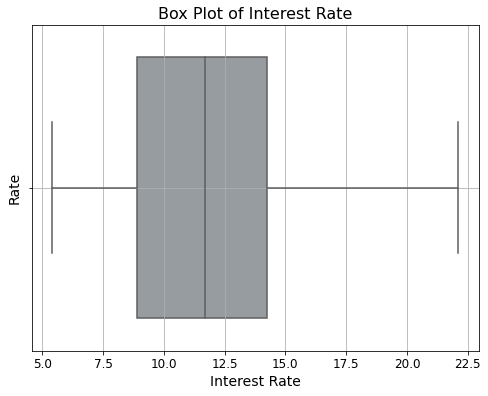

In [64]:
mckinsey_colors = ["#0072CE", "#00A3E0", "#7BCFED", "#6F777D", "#949CA1"]

plt.figure(figsize=(8, 6))
sns.boxplot(x=loan_df_filtered['int_rate'], color=mckinsey_colors[4], flierprops=dict(marker='o', color='red', markersize=5)) # Set outlier color to red
plt.title('Box Plot of Interest Rate', fontsize=16)
plt.xlabel('Interest Rate', fontsize=14)
plt.ylabel('Rate', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

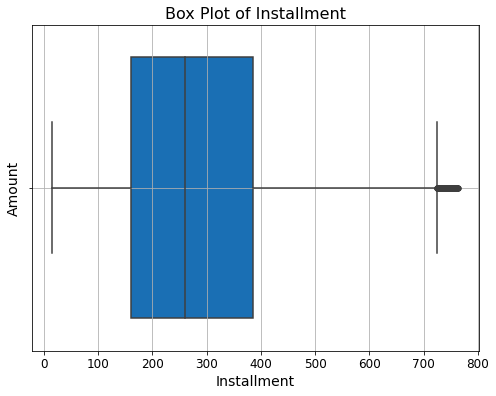

In [65]:
mckinsey_colors = ["#0072CE", "#00A3E0", "#7BCFED", "#6F777D", "#949CA1"]

plt.figure(figsize=(8, 6))
sns.boxplot(x=loan_df_filtered['installment'], color=mckinsey_colors[0], flierprops=dict(marker='o', color='red', markersize=5)) # Set outlier color to red
plt.title('Box Plot of Installment', fontsize=16)
plt.xlabel('Installment', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

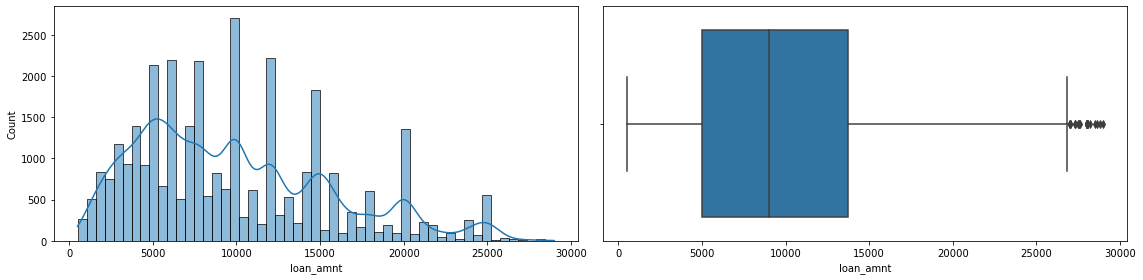

count    33191.000000
mean      9820.838480
std       5809.600807
min        500.000000
25%       5000.000000
50%       9000.000000
75%      13750.000000
max      29000.000000
Name: loan_amnt, dtype: float64


In [75]:
def plot_diagram(df, column):
    fig, p = plt.subplots(1, 2, figsize=(16, 4))
    sns.histplot(df.loc[df[column].notnull(), column], kde=True, ax=p[0])
    sns.boxplot(x=column, data=df, ax=p[1])
    plt.tight_layout()
    plt.show()

# Plot histogram and box plot, and display descriptive statistics
plot_diagram(loan_df_filtered, 'loan_amnt')
print(loan_df_filtered['loan_amnt'].describe())

In [ ]:
#Observation: The majority of loan applications were between $5,000 and $14,000.
# Maximum loan amount applied was ~27k.



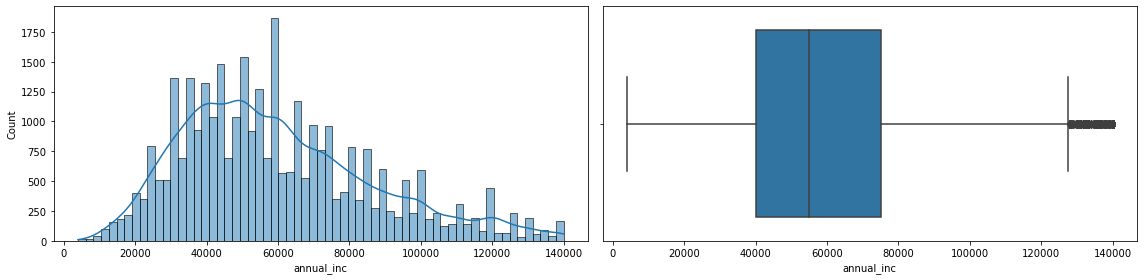

count     33191.000000
mean      59883.284700
std       26916.857415
min        4000.000000
25%       40000.000000
50%       55000.000000
75%       75000.000000
max      140000.000000
Name: annual_inc, dtype: float64


In [76]:
def plot_diagram(df, column):
    fig, p = plt.subplots(1, 2, figsize=(16, 4))
    sns.histplot(df.loc[df[column].notnull(), column], kde=True, ax=p[0])
    sns.boxplot(x=column, data=df, ax=p[1])
    plt.tight_layout()
    plt.show()

# Plot histogram and box plot for 'annual_inc', and display its descriptive statistics
plot_diagram(loan_df_filtered, 'annual_inc')
print(loan_df_filtered['annual_inc'].describe())

In [81]:
# Calculate the average annual income
average_annual_income = round(loan_df_filtered['annual_inc'].mean(), 0)

# Define income range
income_range = '40k - 75k'

# Print the statement
print(f"The majority of applicants have an annual income ranging between {income_range}.")
print("Average Annual Income:", average_annual_income)


The majority of applicants have an annual income ranging between 40k - 75k.
Average Annual Income: 59883.0


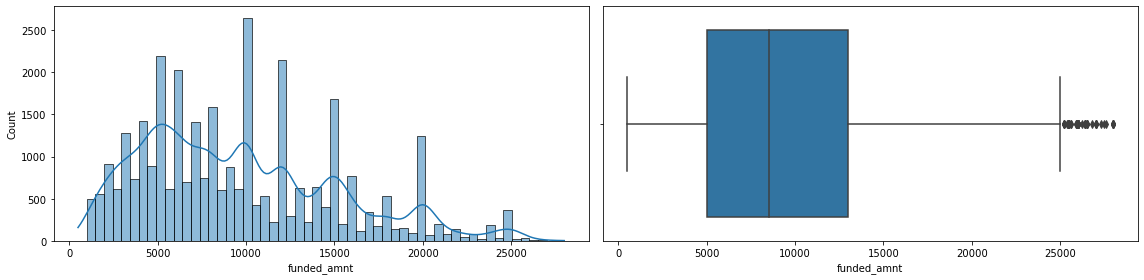

count    33191.000000
mean      9593.825887
std       5565.574327
min        500.000000
25%       5000.000000
50%       8500.000000
75%      13000.000000
max      28000.000000
Name: funded_amnt, dtype: float64


In [82]:
def plot_diagram(df, column):
    fig, p = plt.subplots(1, 2, figsize=(16, 4))
    sns.histplot(df.loc[df[column].notnull(), column], kde=True, ax=p[0])
    sns.boxplot(x=column, data=df, ax=p[1])
    plt.tight_layout()
    plt.show()

# Plot histogram and box plot, and display descriptive statistics
plot_diagram(loan_df_filtered, 'funded_amnt')
print(loan_df_filtered['funded_amnt'].describe())

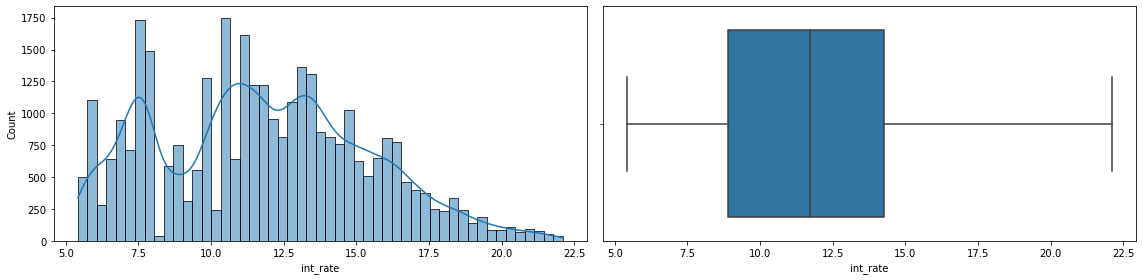

count    33191.000000
mean        11.782783
std          3.591944
min          5.420000
25%          8.900000
50%         11.710000
75%         14.260000
max         22.110000
Name: int_rate, dtype: float64


In [83]:
def plot_diagram(df, column):
    fig, p = plt.subplots(1, 2, figsize=(16, 4))
    sns.histplot(df.loc[df[column].notnull(), column], kde=True, ax=p[0])
    sns.boxplot(x=column, data=df, ax=p[1])
    plt.tight_layout()
    plt.show()

# Plot histogram and box plot, and display descriptive statistics
plot_diagram(loan_df_filtered, 'int_rate')
print(loan_df_filtered['int_rate'].describe())

In [ ]:
# The majority of the applicants' rates of interest vary between 8% and 14%.
#The average rate of interest is 11.7%.


In [ ]:
#5.2 Unordered Categorical Variable Analysis

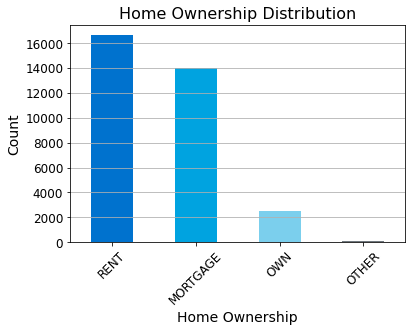

In [86]:
mckinsey_colors = ["#0072CE", "#00A3E0", "#7BCFED", "#6F777D", "#949CA1"]

# Plot bar plot with McKinsey colors
loan_df_filtered['home_ownership'].value_counts().plot(kind='bar', color=mckinsey_colors)

# Customize plot
plt.title('Home Ownership Distribution', fontsize=16)
plt.xlabel('Home Ownership', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(axis='y')

# Show plot
plt.show()


In [ ]:
# The majority of loan applicants either rent or have a mortgage.

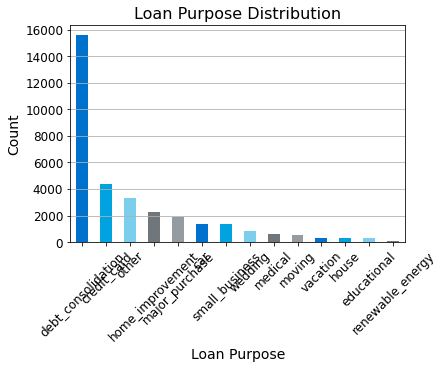

In [87]:
# Define the McKinsey color palette
mckinsey_colors = ["#0072CE", "#00A3E0", "#7BCFED", "#6F777D", "#949CA1"]

# Plot bar plot with McKinsey colors
loan_df_filtered['purpose'].value_counts().plot(kind='bar', color=mckinsey_colors)

# Customize plot
plt.title('Loan Purpose Distribution', fontsize=16)
plt.xlabel('Loan Purpose', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(axis='y')

# Show plot
plt.show()

In [ ]:
# The majority of loan applications are for debt consolidation.

In [88]:
# Group by 'home_ownership' and 'loan_status' and count occurrences
failed_per_homeownership = loan_df_filtered.groupby(['home_ownership', 'loan_status']).size()

# Print the resulting DataFrame
print(failed_per_homeownership)


home_ownership  loan_status
MORTGAGE        Charged Off     1855
                Fully Paid     12127
OTHER           Charged Off       16
                Fully Paid        73
OWN             Charged Off      355
                Fully Paid      2121
RENT            Charged Off     2488
                Fully Paid     14156
dtype: int64


In [99]:
import plotly.express as px

# Define McKinsey color palette
mckinsey_colors = ["#0072CE", "#00A3E0", "#7BCFED", "#6F777D", "#949CA1"]

# Get value counts of states
state_counts = loan_df_filtered['addr_state'].value_counts()

# Create tree map chart with custom colors
fig = px.treemap(names=state_counts.index, parents=["USA"] * len(state_counts), values=state_counts.values,
                 color=state_counts.values, color_continuous_scale=mckinsey_colors)
fig.update_layout(title='State Distribution', margin=dict(t=50, l=0, r=0, b=0))
fig.show()

In [ ]:
# Most of the Loan applicants are from CA(State).

In [ ]:
#5.3 Ordered Categorical Variable Analysis.

In [105]:
# Get value counts of employment lengths
emp_length_counts = loan_df_filtered['emp_length'].value_counts()

# Create tree map chart for employment lengths
fig = px.treemap(names=emp_length_counts.index, parents=["Employment Length"] * len(emp_length_counts), 
                 values=emp_length_counts.values, title='Employment Length Distribution')
fig.update_layout(margin=dict(t=50, l=0, r=0, b=0))
fig.show()


In [ ]:
# Most of the applications are having 10+ yrs of Exp.

In [ ]:
#6 Bivariate Analysis

In [106]:
# Group by annual income range and loan status, and count the number of loans
grouped_df = loan_df_filtered.groupby(['annual_inc_b', 'loan_status'])['loan_status'].count().unstack(fill_value=0)

# Calculate total loans (charged off + fully paid) and charged-off proportion
grouped_df['Total'] = grouped_df['Charged Off'] + grouped_df['Fully Paid']
grouped_df['Chargedoff_Proportion'] = grouped_df['Charged Off'] / grouped_df['Total']

# Sort by charged-off proportion in descending order
grouped_df_sorted = grouped_df.sort_values('Chargedoff_Proportion', ascending=False)

# Reset index to make the dataframe tidy
inc_range_vs_loan = grouped_df_sorted.reset_index()

# Display the result
print(inc_range_vs_loan)


loan_status annual_inc_b  Charged Off  Fully Paid  Total  \
0                0 - 40k         1570        7326   8896   
1             50k to 60k          788        4435   5223   
2              40k - 50k          807        4593   5400   
3             60k to 70k          486        3261   3747   
4             70k to 80k          385        2749   3134   
5            80k - above          678        6113   6791   

loan_status  Chargedoff_Proportion  
0                         0.176484  
1                         0.150871  
2                         0.149444  
3                         0.129704  
4                         0.122846  
5                         0.099838  


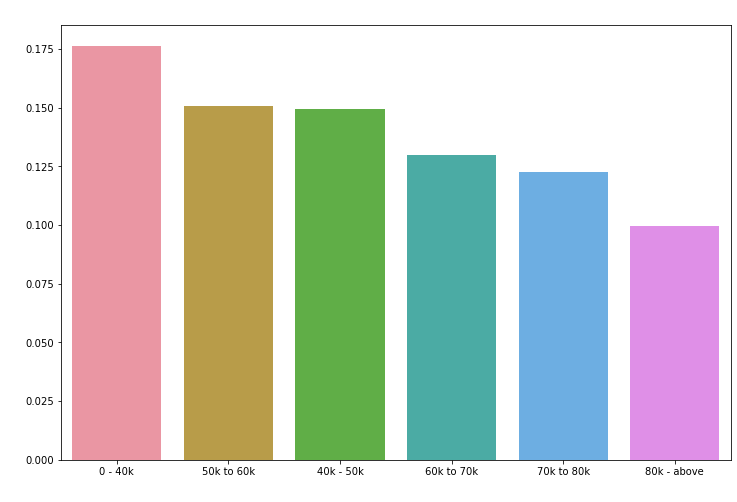

In [136]:
# Set McKinsey color palette
sns.set_palette(["#0072CE"])

# Create bar plot
plt.figure(figsize=(12, 8), facecolor='w')
plt.title('Annual Income vs Chargedoff Proportion', fontsize=15, color='w')
ax = sns.barplot(x='annual_inc_b', y='Chargedoff_Proportion', data=inc_range_vs_loan)
ax.set_ylabel('Chargedoff Proportion', fontsize=14, color='w')
ax.set_xlabel('Annual Income', fontsize=14, color='w')
plt.show()

In [ ]:
#Observations: - Income range 80000+ is less likely to be charged off. 
#Income range 0-20000 is more likely to be charged off. 
#The fraction of charged off accounts decreases with increasing yearly income.


In [111]:
# Group by interest rate range and loan status, and count the number of loans
interest_vs_loan = loan_df_filtered.groupby(['int_rate_b', 'loan_status'])['loan_status'].count().unstack(fill_value=0)

# Calculate total loans (charged off + fully paid) and charged-off proportion
interest_vs_loan['Total'] = interest_vs_loan['Charged Off'] + interest_vs_loan['Fully Paid']
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']

# Sort by charged-off proportion in descending order
interest_vs_loan_sorted = interest_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Reset index to make the dataframe tidy
interest_vs_loan_sorted.reset_index(inplace=True)

# Display the result
print(interest_vs_loan_sorted)


loan_status int_rate_b  Charged Off  Fully Paid  Total  Chargedoff_Proportion
0            Very High         1670        4751   6421               0.260084
1                 High          985        4851   5836               0.168780
2             Moderate          961        5638   6599               0.145628
3                  Low          579        4983   5562               0.104099
4             Very Low          519        8254   8773               0.059159


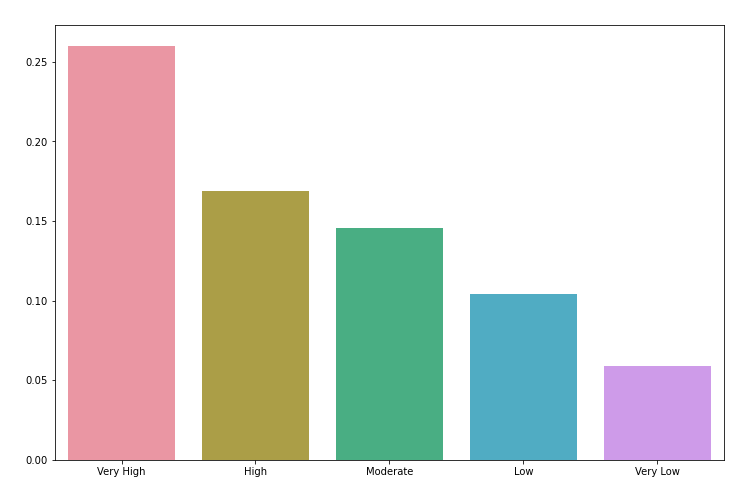

In [137]:
# Create the bar plot
plt.figure(figsize=(12, 8), facecolor='w')
plt.title('Interest Rate vs Chargedoff Proportion', fontsize=15, color='w')
ax = sns.barplot(x='int_rate_b', y='Chargedoff_Proportion', data=interest_vs_loan_sorted)
ax.set_xlabel('Interest Rate', fontsize=14, color='w')
ax.set_ylabel('Chargedoff Proportion', fontsize=14, color='w')
plt.show()

In [ ]:
#Observations: Interest rates below 10% have a minimal possibility of being charged off. Interest rates start at a minimum of 5%.
# Interest rates more than 16% or very high have a higher likelihood of being charged off when compared to other categories of interest rates.
# The proportion of charged-off loans is growing as interest rates rise.



In [122]:
# Group by home ownership and loan status, and count the number of loans
home_ownership_vs_loan = loan_df_filtered.groupby(['home_ownership', 'loan_status'])['loan_status'].count().unstack(fill_value=0)

# Calculate total loans (charged off + fully paid) and charged-off proportion
home_ownership_vs_loan['Total'] = home_ownership_vs_loan['Charged Off'] + home_ownership_vs_loan['Fully Paid']
home_ownership_vs_loan['Chargedoff_Proportion'] = home_ownership_vs_loan['Charged Off'] / home_ownership_vs_loan['Total']

# Sort by charged-off proportion in descending order
home_ownership_vs_loan_sorted = home_ownership_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Reset index to make the dataframe tidy
home_ownership_vs_loan_sorted.reset_index(inplace=True)

# Display the result
print(home_ownership_vs_loan_sorted)

loan_status home_ownership  Charged Off  Fully Paid  Total  \
0                    OTHER           16          73     89   
1                     RENT         2488       14156  16644   
2                      OWN          355        2121   2476   
3                 MORTGAGE         1855       12127  13982   

loan_status  Chargedoff_Proportion  
0                         0.179775  
1                         0.149483  
2                         0.143376  
3                         0.132671  


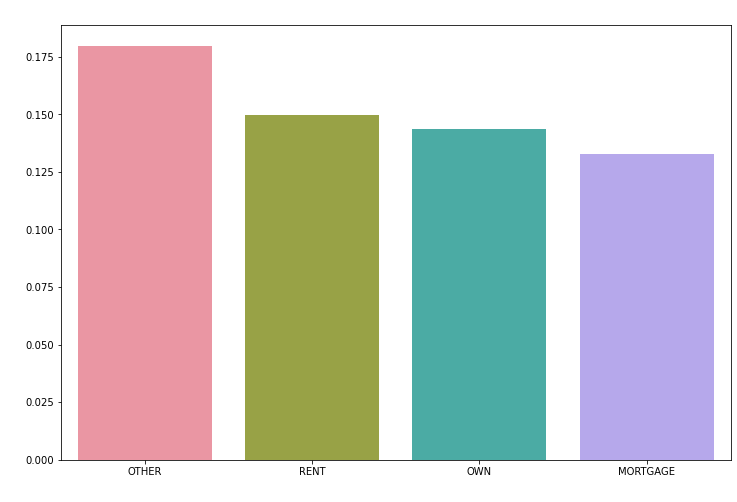

In [138]:
# Create the bar plot
plt.figure(figsize=(12, 8), facecolor='w')
plt.title('Home Ownership vs Chargedoff Proportion', fontsize=15, color='w')
ax = sns.barplot(x='home_ownership', y='Chargedoff_Proportion', data=home_ownership_vs_loan_sorted)
ax.set_xlabel('Home Ownership', fontsize=14, color='w')
ax.set_ylabel('Chargedoff Proportion', fontsize=14, color='w')
plt.show()

In [ ]:
# observation:
# Those who are not owning the home is having high chances of loan defaults.

In [124]:
# Group by purpose and loan status, and count the number of loans
purpose_vs_loan = loan_df_filtered.groupby(['purpose', 'loan_status'])['loan_status'].count().unstack(fill_value=0)

# Calculate total loans (charged off + fully paid) and charged-off proportion
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off'] + purpose_vs_loan['Fully Paid']
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']

# Sort by charged-off proportion in descending order
purpose_vs_loan_sorted = purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Reset index to make the dataframe tidy
purpose_vs_loan_sorted.reset_index(inplace=True)

# Display the result
print(purpose_vs_loan_sorted)


loan_status             purpose  Charged Off  Fully Paid  Total  \
0                small_business          366        1003   1369   
1              renewable_energy           16          67     83   
2                         house           49         249    298   
3                   educational           46         235    281   
4                         other          531        2823   3354   
5                       medical           95         510    605   
6                        moving           79         433    512   
7            debt_consolidation         2329       13253  15582   
8                      vacation           49         281    330   
9              home_improvement          277        2026   2303   
10                          car          150        1224   1374   
11                  credit_card          450        3894   4344   
12               major_purchase          195        1719   1914   
13                      wedding           82         760    84

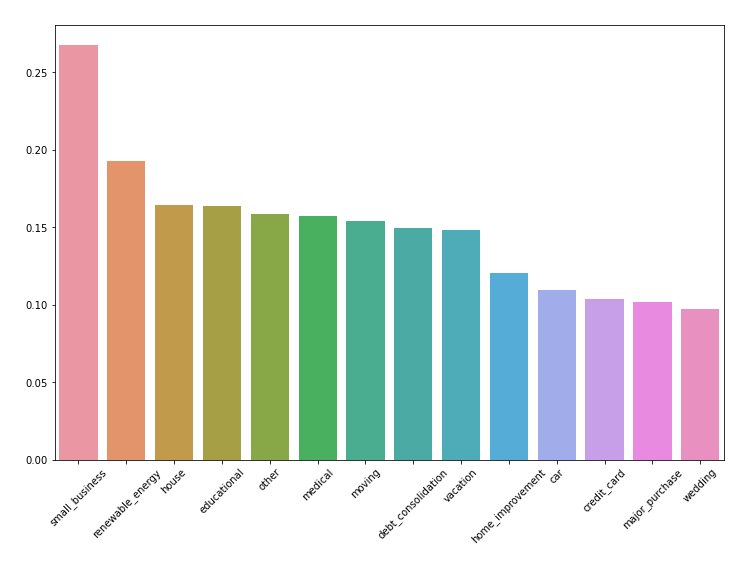

In [139]:
# Create the bar plot
plt.figure(figsize=(12, 8), facecolor='w')
plt.title('Purpose vs Chargedoff Proportion', fontsize=15, color='w')
ax = sns.barplot(x='purpose', y='Chargedoff_Proportion', data=purpose_vs_loan_sorted)
ax.set_xlabel('Purpose of Loan', fontsize=14, color='w')
ax.set_ylabel('Chargedoff Proportion', fontsize=14, color='w')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
#1. Those applicants who is having home loan is having low chances of loan defaults.
#2. Those applicants having loan for small bussiness is having high chances for loan defaults.

In [126]:
# Group by DTI category and loan status, and count the number of loans
dti_vs_loan = loan_df_filtered.groupby(['dti_b', 'loan_status'])['loan_status'].count().unstack(fill_value=0)

# Calculate total loans (charged off + fully paid) and charged-off proportion
dti_vs_loan['Total'] = dti_vs_loan['Charged Off'] + dti_vs_loan['Fully Paid']
dti_vs_loan['Chargedoff_Proportion'] = dti_vs_loan['Charged Off'] / dti_vs_loan['Total']

# Sort by charged-off proportion in descending order
dti_vs_loan_sorted = dti_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Reset index to make the dataframe tidy
dti_vs_loan_sorted.reset_index(inplace=True)

# Display the result
print(dti_vs_loan_sorted)


loan_status      dti_b  Charged Off  Fully Paid  Total  Chargedoff_Proportion
0            Very High         1044        5387   6431               0.162339
1                 High          948        5111   6059               0.156461
2             Moderate          985        5785   6770               0.145495
3                  Low          789        5339   6128               0.128753
4             Very Low          948        6855   7803               0.121492


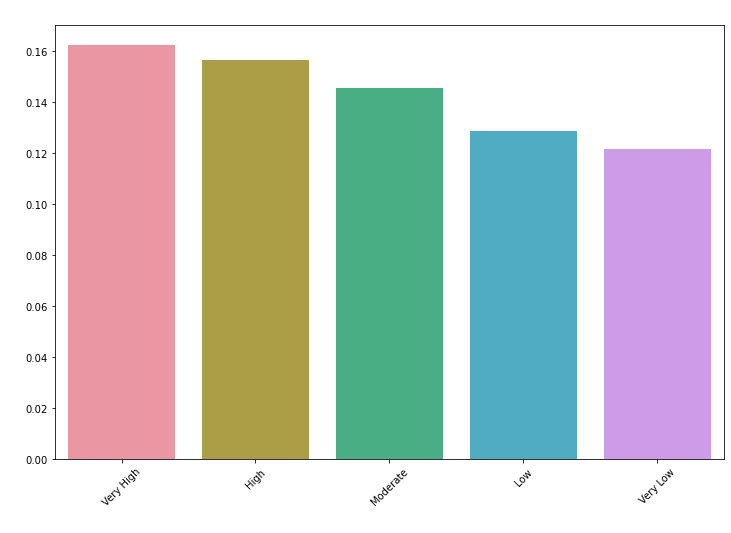

In [140]:
# Create the bar plot
plt.figure(figsize=(12, 8), facecolor='w')
plt.title('Debt To Income Ratio vs Chargedoff Proportion', fontsize=15, color='w')
ax = sns.barplot(x='dti_b', y='Chargedoff_Proportion', data=dti_vs_loan_sorted)
ax.set_xlabel('Debt To Income Ratio', fontsize=14, color='w')
ax.set_ylabel('Chargedoff Proportion', fontsize=14, color='w')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
# Observation:
#1.High DTI value  having high risk of defaults
# 2 Lower the DTO having low chances loan defaults.

In [128]:
pub_rec_bankruptcies_counts = loan_df_filtered['pub_rec_bankruptcies'].value_counts()
print(pub_rec_bankruptcies_counts)

0.0    31741
1.0     1445
2.0        5
Name: pub_rec_bankruptcies, dtype: int64


loan_status  pub_rec_bankruptcies  Charged Off  Fully Paid  Total  \
0                             2.0            2           3      5   
1                             1.0          308        1137   1445   
2                             0.0         4404       27337  31741   

loan_status  Chargedoff_Proportion  
0                         0.400000  
1                         0.213149  
2                         0.138748  


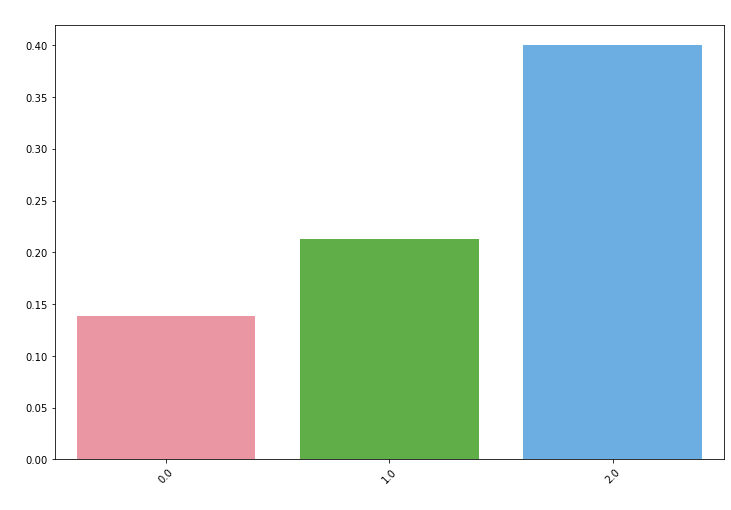

In [141]:
# Group by 'pub_rec_bankruptcies' and 'loan_status', and count the number of loans
pub_rec_bankruptcies_vs_loan = loan_df_filtered.groupby(['pub_rec_bankruptcies', 'loan_status'])['loan_status'].count().unstack(fill_value=0)

# Calculate total loans (charged off + fully paid) and charged-off proportion
pub_rec_bankruptcies_vs_loan['Total'] = pub_rec_bankruptcies_vs_loan['Charged Off'] + pub_rec_bankruptcies_vs_loan['Fully Paid']
pub_rec_bankruptcies_vs_loan['Chargedoff_Proportion'] = pub_rec_bankruptcies_vs_loan['Charged Off'] / pub_rec_bankruptcies_vs_loan['Total']

# Sort by charged-off proportion in descending order
pub_rec_bankruptcies_vs_loan_sorted = pub_rec_bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Reset index to make the dataframe tidy
pub_rec_bankruptcies_vs_loan_sorted.reset_index(inplace=True)

# Display the sorted dataframe
print(pub_rec_bankruptcies_vs_loan_sorted)

# Plotting the graph
fig, ax1 = plt.subplots(figsize=(12, 8), facecolor='w')
ax1.set_title('Bankruptcies Record vs Chargedoff Proportion', fontsize=15, color='w')
ax1 = sns.barplot(x='pub_rec_bankruptcies', y='Chargedoff_Proportion', data=pub_rec_bankruptcies_vs_loan_sorted)
ax1.set_xlabel('Bankruptcies Record', fontsize=14, color='w')
ax1.set_ylabel('Chargedoff Proportion', fontsize=14, color='w')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
# Observations: 1. Bankruptcies Record number 2 has a significant influence on debt defaults, namely bankruptcy. 
#2.Record with 0 has a modest influence on loan defaults.
#3.Reduce the number of bankruptcies to reduce risk.


loan_status  issue_year  Charged Off  Fully Paid  Total  Chargedoff_Proportion
0                  2007            2           5      7               0.285714
1                  2011         2705       14788  17493               0.154633
2                  2008          158         880   1038               0.152216
3                  2010         1312        9012  10324               0.127083
4                  2009          537        3792   4329               0.124047


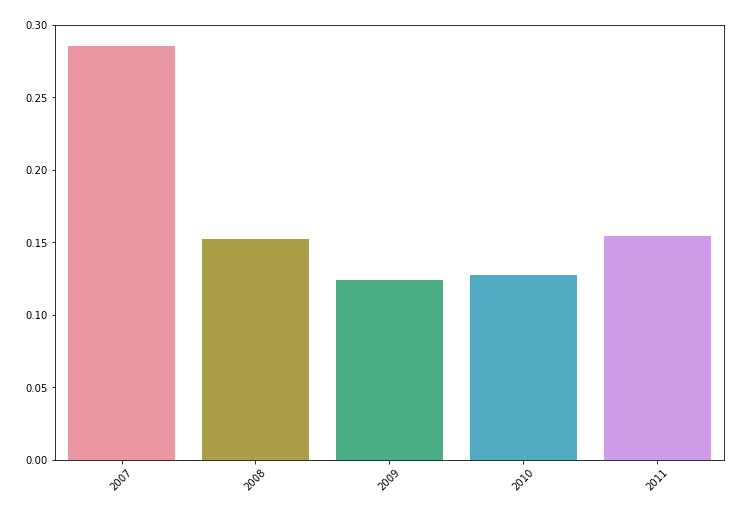

In [142]:
# Group by 'issue_year' and 'loan_status', and count the number of loans
issue_year_vs_loan = loan_df_filtered.groupby(['issue_year', 'loan_status'])['loan_status'].count().unstack(fill_value=0)

# Calculate total loans (charged off + fully paid) and charged-off proportion
issue_year_vs_loan['Total'] = issue_year_vs_loan['Charged Off'] + issue_year_vs_loan['Fully Paid']
issue_year_vs_loan['Chargedoff_Proportion'] = issue_year_vs_loan['Charged Off'] / issue_year_vs_loan['Total']

# Sort by charged-off proportion in descending order
issue_year_vs_loan_sorted = issue_year_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Reset index to make the dataframe tidy
issue_year_vs_loan_sorted.reset_index(inplace=True)

# Display the sorted dataframe
print(issue_year_vs_loan_sorted)

# Plotting the graph
fig, ax1 = plt.subplots(figsize=(12, 8), facecolor='w')
ax1.set_title('Issue Year vs Chargedoff Proportion', fontsize=15, color='w')
ax1 = sns.barplot(x='issue_year', y='Chargedoff_Proportion', data=issue_year_vs_loan_sorted)
ax1.set_xlabel('Year', fontsize=14, color='w')
ax1.set_ylabel('Chargedoff Proportion', fontsize=14, color='w')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
# Year 2007 is highest loan defaults.
    # 2009 is having lowest loan defaults.


loan_status  issue_month  Charged Off  Fully Paid  Total  \
0                      9          477        2531   3008   
1                     12          567        3034   3601   
2                      5          401        2188   2589   
3                     10          462        2693   3155   
4                      6          410        2390   2800   
5                     11          494        2976   3470   
6                      7          415        2534   2949   
7                      8          405        2562   2967   
8                      1          260        1724   1984   
9                      4          317        2176   2493   
10                     3          282        1981   2263   
11                     2          224        1688   1912   

loan_status  Chargedoff_Proportion  
0                         0.158577  
1                         0.157456  
2                         0.154886  
3                         0.146434  
4                         0.146429

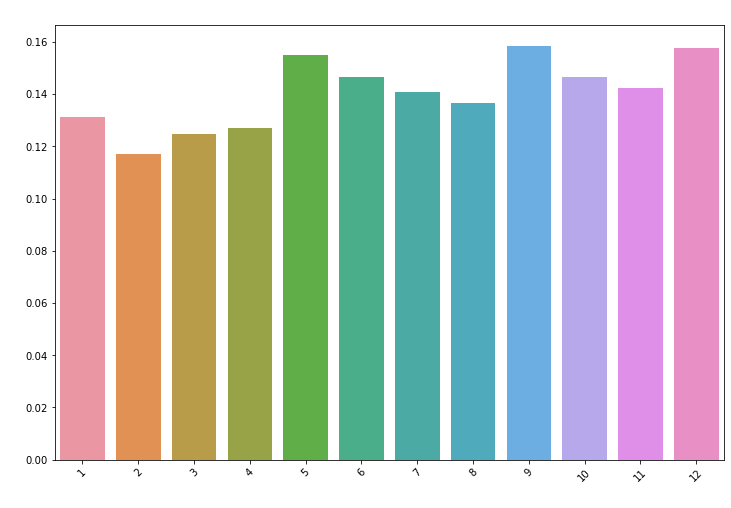

In [143]:
# Group by 'issue_month' and 'loan_status', and count the number of loans
issue_month_vs_loan = loan_df_filtered.groupby(['issue_month', 'loan_status'])['loan_status'].count().unstack(fill_value=0)

# Calculate total loans (charged off + fully paid) and charged-off proportion
issue_month_vs_loan['Total'] = issue_month_vs_loan['Charged Off'] + issue_month_vs_loan['Fully Paid']
issue_month_vs_loan['Chargedoff_Proportion'] = issue_month_vs_loan['Charged Off'] / issue_month_vs_loan['Total']

# Sort by charged-off proportion in descending order
issue_month_vs_loan_sorted = issue_month_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Reset index to make the dataframe tidy
issue_month_vs_loan_sorted.reset_index(inplace=True)

# Display the sorted dataframe
print(issue_month_vs_loan_sorted)

# Plotting the graph
fig, ax1 = plt.subplots(figsize=(12, 8), facecolor='w')
ax1.set_title('Issue Month vs Chargedoff Proportion', fontsize=15, color='w')
ax1 = sns.barplot(x='issue_month', y='Chargedoff_Proportion', data=issue_month_vs_loan_sorted)
ax1.set_xlabel('Issue Month', fontsize=14, color='w')
ax1.set_ylabel('Chargedoff Proportion', fontsize=14, color='w')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
#1. Loans granted in May, September, and December have a high number of defaults.
# 2. Loans issued in February have a high rate of defaults.
#3. The majority of loan failures come from applicants whose loans were approved between September and December.


loan_status addr_state  Charged Off  Fully Paid  Total  Chargedoff_Proportion
0                   TN            2           7      9               0.222222
1                   NV           87         328    415               0.209639
2                   HI           28         119    147               0.190476
3                   AK           12          51     63               0.190476
4                   SD           11          48     59               0.186441
5                   NM           28         133    161               0.173913
6                   FL          414        1990   2404               0.172213
7                   MO           99         492    591               0.167513
8                   OR           63         328    391               0.161125
9                   GA          184         981   1165               0.157940
10                  NJ          241        1290   1531               0.157413
11                  CA          933        5038   5971          

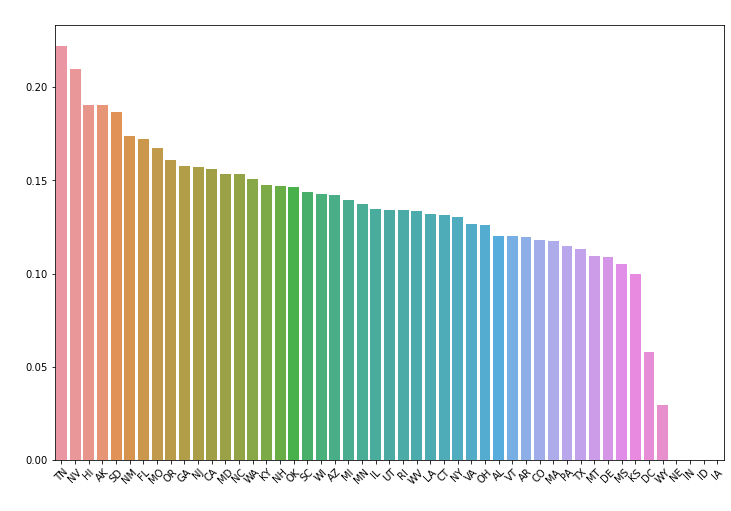

In [134]:
# Group by 'addr_state' and 'loan_status', and count the number of loans
addr_state_vs_loan = loan_df_filtered.groupby(['addr_state', 'loan_status'])['loan_status'].count().unstack(fill_value=0)

# Calculate total loans (charged off + fully paid) and charged-off proportion
addr_state_vs_loan['Total'] = addr_state_vs_loan['Charged Off'] + addr_state_vs_loan['Fully Paid']
addr_state_vs_loan['Chargedoff_Proportion'] = addr_state_vs_loan['Charged Off'] / addr_state_vs_loan['Total']

# Sort by charged-off proportion in descending order
addr_state_vs_loan_sorted = addr_state_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Reset index to make the dataframe tidy
addr_state_vs_loan_sorted.reset_index(inplace=True)

# Display the sorted dataframe
print(addr_state_vs_loan_sorted)

# Plotting the graph
fig, ax1 = plt.subplots(figsize=(12, 8), facecolor='w')
ax1.set_title('State vs Chargedoff Proportion', fontsize=15, color='w')
ax1 = sns.barplot(x='addr_state', y='Chargedoff_Proportion', data=addr_state_vs_loan_sorted)
ax1.set_xlabel('State', fontsize=14, color='w')
ax1.set_ylabel('Chargedoff Proportion', fontsize=14, color='w')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
#Observations: 1. DE has the greatest number of loan defaults.
#2. CA has a low number of loan defaults.


loan_status grade  Charged Off  Fully Paid  Total  Chargedoff_Proportion
0               G           55         104    159               0.345912
1               F          220         480    700               0.314286
2               E          557        1518   2075               0.268434
3               D          941        3329   4270               0.220375
4               C         1177        5702   6879               0.171100
5               B         1225        8857  10082               0.121504
6               A          539        8487   9026               0.059716


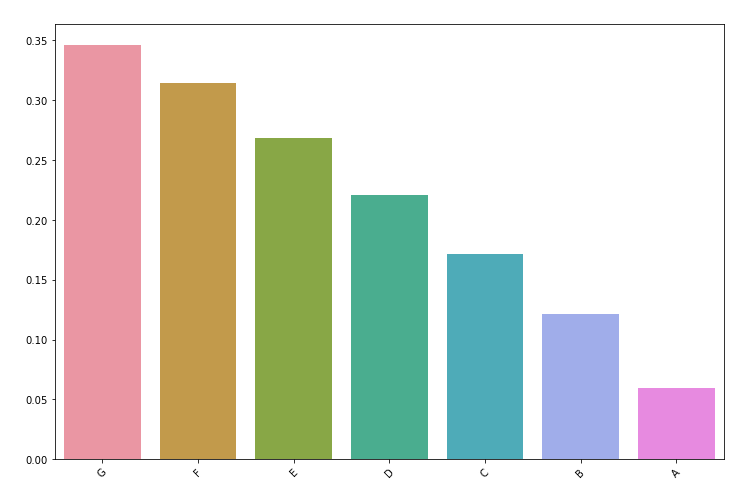

In [144]:
# Group by 'grade' and 'loan_status', and count the number of loans
grade_vs_loan = loan_df_filtered.groupby(['grade', 'loan_status'])['loan_status'].count().unstack(fill_value=0)

# Calculate total loans (charged off + fully paid) and charged-off proportion
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Fully Paid']
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']

# Sort by charged-off proportion in descending order
grade_vs_loan_sorted = grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Reset index to make the dataframe tidy
grade_vs_loan_sorted.reset_index(inplace=True)

# Display the sorted dataframe
print(grade_vs_loan_sorted)

# Plotting the graph
fig, ax1 = plt.subplots(figsize=(12, 8), facecolor='w')
ax1.set_title('Grade vs Chargedoff Proportion', fontsize=15, color='w')
ax1 = sns.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan_sorted)
ax1.set_xlabel('Grade', fontsize=14, color='w')
ax1.set_ylabel('Chargedoff Proportion', fontsize=14, color='w')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
#Observations: #1. Loan applicants with Loan Grade G have the highest loan default rates.
#2. Loan applicants with loan A have the lowest loan defaults.


In [ ]:
#7 Correlation Analysis

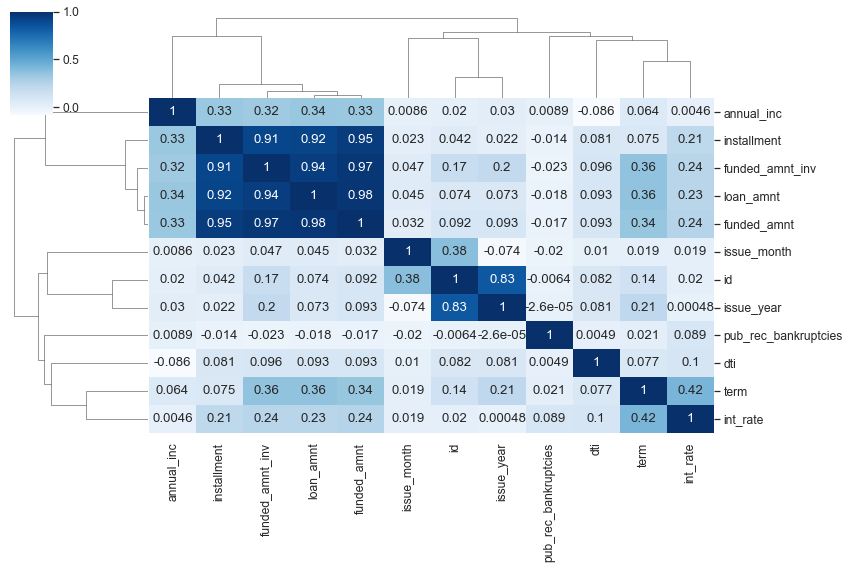

In [147]:
# Compute the correlation matrix
corr_loan = loan_df_filtered.corr()

# Set the font scale
sns.set(font_scale=1.1)

# Plot the cluster map
sns.clustermap(corr_loan, annot=True, figsize=(12, 8), cmap="Blues")

# Display the plot
plt.show()


In [148]:
# Define the columns to drop
drop_columns = ['installment', 'id', 'issue_year', 'issue_month']

# Drop the specified columns
corr_loan = corr_loan.drop(columns=drop_columns)


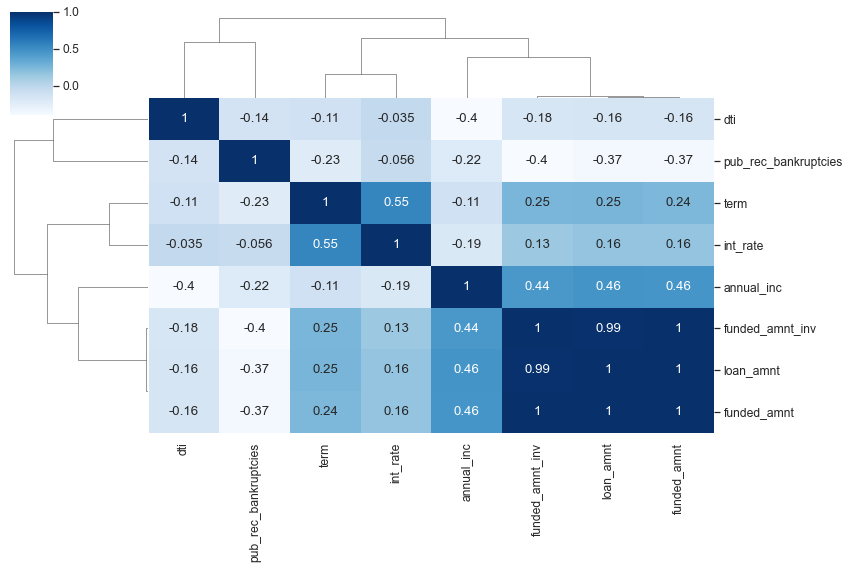

In [151]:
# Calculate the correlation matrix
corr = corr_loan.corr()

# Set the font scale
sns.set(font_scale=1.1)

# Create a clustered heatmap with annotations
sns.clustermap(corr, annot=True, figsize=(12, 8), cmap="Blues")

# Display the plot
plt.show()


In [ ]:
#Negative correlation:

#1. loan_amnt shows a negative connection with pub_rec_bankruptcies.

#2: Annual income shows a negative connection with dti.

#Strong correlation:

#1.term has a high association with the loan amount.

#2.Term has a high association with interest rates.

#3. Annual income has a high association with loan amount.


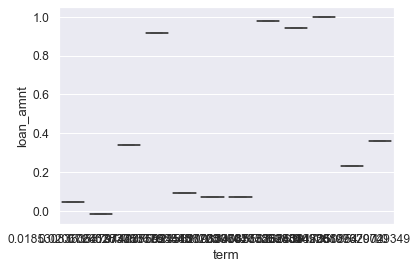

In [153]:
# Create a boxplot
sns.boxplot(x=corr_loan['term'], y=corr_loan['loan_amnt'])

# Show the plot
plt.show()


In [ ]:
#From the graph above, we can see that as the duration increases, so does the loan amount.

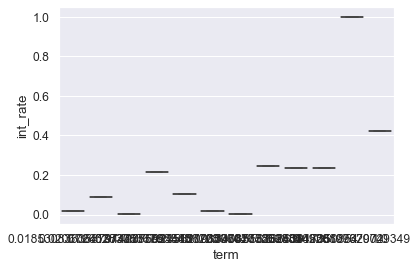

In [154]:
# Create a boxplot
sns.boxplot(x=corr_loan['term'], y=corr_loan['int_rate'])

# Show the plot
plt.show()
